In [1]:
import h5py
import numpy as np

# Load dataset
def load_dataset():
  train_dataset = h5py.File('datasets/train_happy.h5', 'r')
  train_x, train_y = np.array(train_dataset['train_set_x']), np.array(train_dataset['train_set_y'])

  test_dataset = h5py.File('datasets/test_happy.h5', 'r')
  test_x, test_y = np.array(test_dataset['test_set_x']), np.array(test_dataset['test_set_y'])

  classes = np.array(test_dataset['list_classes'])

  return train_x, train_y, test_x, test_y, classes

In [2]:
train_x, train_y, test_x, test_y, classes = load_dataset()

y = 0 (Not happy)


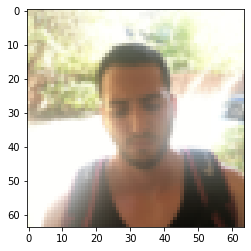

In [3]:
import matplotlib.pyplot as plt

# Visualize an example 
idx = 20
plt.imshow(train_x[idx])

# Print the label of that example
y = train_y[idx]
print(f'y = {y}', end=' ')
print('(Happy)' if y == 1 else '(Not happy)')

In [4]:
# Normalize the data
train_x = train_x / 255.
test_x = test_x / 255.

In [5]:
import tensorflow as tf
import tensorflow.keras.layers as tfl

# Build the model
'''
The structure is: ZeroPadding2D -> Conv2D -> BatchNorm -> ReLU -> MaxPool2D -> Flatten -> Dense
'''

model = tf.keras.Sequential([
  tfl.ZeroPadding2D(padding=(3, 3), input_shape=(64, 64, 3)),     # Pad the input with zeros
  tfl.Conv2D(filters=32, kernel_size=(7,7), strides=(1,1)),       # Convolution layer with 32 7x7 filters
  tfl.BatchNormalization(axis=3),                                 # Batch normalization to maintain the mean of output close to 0 and the standard deviation of output close to 1
  tfl.ReLU(),
  tfl.MaxPooling2D(),
  tfl.Flatten(),
  tfl.Dense(units=1, activation='sigmoid')
])

In [6]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d (ZeroPadding  (None, 70, 70, 3)        0         
 2D)                                                             
                                                                 
 conv2d (Conv2D)             (None, 64, 64, 32)        4736      
                                                                 
 batch_normalization (BatchN  (None, 64, 64, 32)       128       
 ormalization)                                                   
                                                                 
 re_lu (ReLU)                (None, 64, 64, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                        

In [8]:
# Train the model
model.fit(train_x, train_y, epochs=10, batch_size=16)

Epoch 1/10
38/38 [==============================] - 10s 9ms/step - loss: 0.9619 - accuracy: 0.7767
Epoch 2/10
38/38 [==============================] - 0s 5ms/step - loss: 0.2662 - accuracy: 0.8850
Epoch 3/10
38/38 [==============================] - 0s 5ms/step - loss: 0.1238 - accuracy: 0.9550
Epoch 4/10
38/38 [==============================] - 0s 5ms/step - loss: 0.1175 - accuracy: 0.9483
Epoch 5/10
38/38 [==============================] - 0s 4ms/step - loss: 0.1775 - accuracy: 0.9283
Epoch 6/10
38/38 [==============================] - 0s 4ms/step - loss: 0.0848 - accuracy: 0.9733
Epoch 7/10
38/38 [==============================] - 0s 4ms/step - loss: 0.1034 - accuracy: 0.9650
Epoch 8/10
38/38 [==============================] - 0s 4ms/step - loss: 0.0813 - accuracy: 0.9767
Epoch 9/10
38/38 [==============================] - 0s 4ms/step - loss: 0.1006 - accuracy: 0.9617
Epoch 10/10
38/38 [==============================] - 0s 4ms/step - loss: 0.0817 - accuracy: 0.9767


In [9]:
# Evaluate
model.evaluate(test_x, test_y)

5/5 [==============================] - 0s 11ms/step - loss: 0.1643 - accuracy: 0.9533


[0.16433416306972504, 0.95333331823349]

In [10]:
# Inspect the shape of data
print(f'train_x shape: {train_x.shape}')
print(f'train_y shape: {train_y.shape}')
print(f'test_x shape: {test_x.shape}')
print(f'test_y shape: {test_y.shape}')

train_x shape: (600, 64, 64, 3)
train_y shape: (600,)
test_x shape: (150, 64, 64, 3)
test_y shape: (150,)
